In [1]:
from sklearn import datasets
import pandas as pd

In [2]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data)
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [3]:
import sqlite3
connect = sqlite3.connect('./db.sqlite3') # 파일이 생성됐는지 확인
df_iris.to_sql('iris_resource', connect,if_exists= 'append', index= False)

In [4]:
df_load = pd.read_sql_query('select * from iris_resource', connect)
df_load.head(4)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [5]:
x_data = df_load.to_numpy()
x_data.shape

(150, 4)

In [6]:
import numpy as np

y_data= iris.target
y_data, np.unique(y_data)

# unique한 값 3개 -> output으로 의견을 내야하는 값 (dense 수)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([0, 1, 2]))

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data)

In [8]:
import tensorflow as tf

model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(4, ))) # input layer

model.add(tf.keras.layers.Dense(64, activation= 'relu')) # hidden layer
model.add(tf.keras.layers.Dense(34, activation= 'relu')) 

model.add(tf.keras.layers.Dense(3, activation= 'softmax')) # output layer


model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['acc']) # gadget

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 34)                2210      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 105       
Total params: 2,635
Trainable params: 2,635
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(x_train, y_train, epochs= 50, validation_data= (x_val, y_val)) # 학습

# model.fit(x_data, y_data, epochs= 50, validation_split= 0.3) 
# 전체 양 중에서 0.3만큼 쪼개서 검증

Epoch 1/50
4/4 [==============================] - 1s 61ms/step - loss: 1.1990 - acc: 0.5089 - val_loss: 1.1627 - val_acc: 0.3421
Epoch 2/50
4/4 [==============================] - 0s 9ms/step - loss: 1.0618 - acc: 0.3661 - val_loss: 1.0438 - val_acc: 0.2895
Epoch 3/50
4/4 [==============================] - 0s 9ms/step - loss: 0.9846 - acc: 0.3482 - val_loss: 0.9562 - val_acc: 0.2895
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 0.9241 - acc: 0.5536 - val_loss: 0.8911 - val_acc: 0.6579
Epoch 5/50
4/4 [==============================] - 0s 9ms/step - loss: 0.8679 - acc: 0.6696 - val_loss: 0.8344 - val_acc: 0.6579
Epoch 6/50
4/4 [==============================] - 0s 9ms/step - loss: 0.8229 - acc: 0.6696 - val_loss: 0.7902 - val_acc: 0.6579
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 0.7808 - acc: 0.6696 - val_loss: 0.7484 - val_acc: 0.6579
Epoch 8/50
4/4 [==============================] - 0s 9ms/step - loss: 0.7410 - acc: 0.6696 - val_loss:

# Evaluation

In [11]:
model.evaluate(x_data, y_data)

# 2개(loss, accuracy)의 편차

5/5 [==============================] - 0s 2ms/step - loss: 0.1522 - acc: 0.9800


[0.1521822214126587, 0.9800000190734863]

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
y_pred = model.predict(x_data)
y_pred.shape, y_pred[4]

((150, 3), array([9.8836088e-01, 1.1530638e-02, 1.0851201e-04], dtype=float32))

In [14]:
y_data.shape, y_data[4]

((150,), 0)

In [15]:
import numpy as np
y_pred_argmax = np.argmax(y_pred, axis= 1) # 행 기준
y_pred_argmax.shape, y_pred_argmax[4]

# 사이즈를 맞춤. classification 실행

((150,), 0)

In [16]:
print(classification_report(y_data, y_pred_argmax))

# f1-score: 1에 가까울수록 좋음
# accuracy:0.5는 넘어야 함

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.94      0.97        50
           2       0.94      1.00      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [17]:
confusion_matrix(y_data, y_pred_argmax)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  0, 50]])

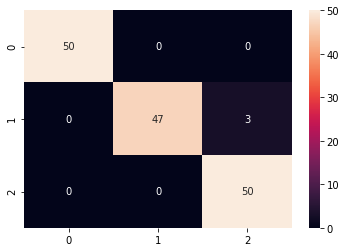

In [18]:
import seaborn as sns

sns.heatmap( confusion_matrix(y_data, y_pred_argmax), annot= True )
# 대각선 라인에 색이 들어와야 정상

# Service

In [19]:
x_data[25], y_data[25]

(array([5. , 3. , 1.6, 0.2]), 0)

In [20]:
pred = model.predict([[5. , 3. , 1.6, 0.2]])
pred

# 25번째 데이터를 보니, 1번째 분류일 가능성은 0.3302766, 2번째 분류 0.33684278 ~~

array([[9.6770924e-01, 3.1885408e-02, 4.0540379e-04]], dtype=float32)

In [21]:
import numpy as np

np.argmax(pred)

0

In [22]:
from sklearn.metrics import roc_curve, auc